# ИССЛЕДОВАНИЕ ОБЪЯВЛЕНИЙ О ПРОДАЖЕ КВАРТИР.

Заказчик - региональный отдел Яндекс.Недвижимость.

Задача - определить рыночную стоимость объектов недвижимости и установить параметры для автоматизированной системы, чтобы отслеживать аномалии. В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**План работы**:
1. Загрузка и описание данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Общий вывод.

## Загрузка и описание данных. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Итак, наш начальный датафрейм включает данные по продажам квартир в Сенк-Петербурге и Ленобласти за несколько лет (графу с датами мы позже приведём к более удобному и понятному виду) с ключевыми показателями:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

С ними нам предстоит провести работу, и понять, что оказывает влияние на цену квартир. Нам известно, что часть показателей получена о пользователей, а часть получена от геосервисов: наличие водоёмов и парков, а также расстояния до них и до центра города и аэропорта. Всего 23699 записей.

## Предобработка данных.

**2.1. Проверим количество пропущенных значений для каждого столбца:**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.duplicated().sum()

0

Явных дубликатов нет (с неявными разберемся позже). Есть пропуски в: высота потолков, число этажей в доме, жилая площадь, аппартаменты, площадь кухни, число балконов, название населенного пункта, расстояния до аэропорта, центра города, парки в радиусе 3 км, расстояния до парков, водоёмы в радиусе 3 км, расстояния до водоёмов, число дней объявления.

Предположим, что пропуски в аппартаментах и балконах продавцы оставили, руководствуясь принцыпом "если нет - не заполняю". Таким образом, позже пропуски в аппартаментах заменим на Fasle, в балконах на 0. С остальными разберемся более подробно.

**Узнаем высоты потолка:**

In [8]:
print(data['ceiling_height'].max())
print(data['ceiling_height'].min())
print(data['ceiling_height'].unique())

100.0
1.0
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04
 

Заполнять напрямую медианным значением не очень логично - помимо пропусков указаны: минимальная 1, максимальная 100, встречаются значения и по 2, 10, 20, 30 и более - высоты явно в метрах, но с ошибками. Эти данные также указываются продавцами, они могли счесть информацию неважной или ошибиться при вводе, поэтому есть такие артефакты. Основываясь на опыте, в будущем примем высоты потолка от 2,2 м до 7 м (не исключаем 2-этажные квартиры) - возможно в высотах 20-30 просто не туда попала запятая, а пропуски будем заполнять медианными значениями.

**Количество этажей:**

In [9]:
print(data['floors_total'].max())
print(data['floors_total'].min())
print(data['floors_total'].unique())

60.0
1.0
[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]


Пропуски здесь мы можем заполнить медианой, но лучше сверить с этажом самой квартиры. К тому же тип данных - дробный, приведём к целочисленным. Проверим, от каких этажей можем отталкиваться:

In [10]:
data[data['floors_total'].isna()]['floor'].unique()

array([ 4,  1, 12,  8,  9, 22, 15,  6,  7,  3, 18, 13, 24, 21, 11,  2,  5,
       19, 20, 14, 17, 23, 10], dtype=int64)

**Жилая площадь** и **Площадь кухни** - пропуски могут встречаться, если квартиры - студии или со свободной планировкой. Проверим:

In [11]:
print(len(data[(data['living_area'].isna()) & (data['studio'] == False)]))
print(len(data[(data['kitchen_area'].isna()) & (data['studio'] == False)]))
print(len(data[(data['living_area'].isna()) & (data['open_plan'] == False)]))
print(len(data[(data['kitchen_area'].isna()) & (data['open_plan'] == False)]))

1893
2129
1898
2211


Ну и чтобы убедиться, что у студий с площадью кухни:

In [12]:
data[data['studio'] == True]['kitchen_area'].unique()

array([nan])

А могут ли быть артефакты в площади? Например, когда сумма жилой и площади кухни больше, чем общая?

In [13]:
area_check = data['total_area'] - data['kitchen_area'] - data['living_area']
data[area_check <= 0][['total_area', 'kitchen_area', 'living_area']]

,total_area,kitchen_area,living_area
184,30.20,6.20,26.10
220,37.00,9.00,28.00
545,23.80,5.00,20.00
551,31.59,9.28,30.55
601,53.70,7.00,48.30
...,...,...,...
22869,25.00,11.00,14.00
22963,102.00,24.00,78.00
23202,67.92,13.04,63.00
23297,48.20,6.00,42.20


Большинство квартир с пропусками жилой площади и площади кухни - не студии и не свободной планировки. При этом площади кухни у студий отсутствуют. Это данные от продавца - скорее всего человеческий фактор. Поступим следующим образом:
- для квартир-студий площадь кухни назначим 0
- для остальных квартир площадь кухни, а также жилую площадь посчитаем как долю от общей площади. Величину доли посчитаем медианную для квартир с аналогичным количеством комнат.

Также есть 132 квартиры с общей площадью меньшей или равной сумме жилой и кухни. Для таких квартир примем правило - жилая площадь равна 80% общей за вычетом кухни.

**Название населённого пункта** не указано у 49 квартир. Данную информацию невозможно восстановить, поэтому эти строки решено удалить. Данные были получены из геосервисов, поэтому могли быть утеряны или не внесены изначально (например, когда строящемуся объекту еще не присвоен адрес), но т.к. их 0,2% - удаление не повредит рассчётам.

**Парки, водоёмы и расстояния** - также из геосервисов, их пропуски оставим без изменений - без точного адреса их не восстановить, а в исследовании они нам не понядобятся.

Пропуски в столбце **Количество дней размещения объявлений** оставим без изменения - возможно, квартиры были сняты с продажи по каким-то причинам.


**2.2. Вывод**
 Мы проанализировали в первом приближении все пропущенные или очевидно некорректные значения, и составили план действий:
- заменить пропущенные значения высоты потолка на медианные, а где возможно - переместить ошибочную запятую
- заполнить пропущенные высоты потолка
- заполнить пропущенные этажи
- высчитать жилые площади и площади кухонь на основе замеченных закономерностей
- заполнить пропущенные значения в полях "апартаменты" и "балкон"
- привести данные к целочисленным, где дробные части не имеют смысла

Помимо прочего:
- в дате размещения объявления сохранено время, и формат даты не дружелюбный. Для удобства оставим только дату, без часов, и заменим тип данных на временной
- столбец cityCenters_nearest переименуем в "змеиный" стиль
- в столбце locality_name могут встречаться неявные дубликаты

**2.3. Двигаемся по плану:**

Начнём с простого - переименуем расстояние до центра:

In [14]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

Сделаем "читабельными" даты и уберём времена:

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1d')

Высоты потолка:

In [16]:
data.loc[(data['ceiling_height'] >= 14), 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].describe()

count    23699.000000
mean         2.698189
std          0.242478
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

Количество этажей:

In [17]:
for i in [4,  1, 12,  8,  9, 22, 15,  6,  7,  3, 18, 13, 24, 21, 11,  2,  5,
       19, 20, 14, 17, 23, 10]:
    data.loc[(data['floors_total'].isna()) & (data['floor'] <= i), 'floors_total'] = i
    
data['floors_total'].describe()   

count    23699.000000
mean        10.683025
std          6.598868
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Жилые площади. Для каждого количества комнат считаем, какая медианная доля общей площади - жилая, и назначаем для пропусков такое значение:

In [18]:
for i in range(0, data['rooms'].max()):
    ratio = (data[data['rooms'] == i]['living_area'] / data[data['rooms'] == i]['total_area']).median()
    data['living_area'] = data['living_area'].fillna(value = data['total_area'] * ratio)
data['living_area'].describe()

count    23699.000000
mean        35.197482
std         23.025540
min          2.000000
25%         19.000000
50%         30.400000
75%         42.900000
max        435.172414
Name: living_area, dtype: float64

Площади кухни. У студий кухонь нет - назначим 0. Для каждого количества комнат считаем, какая медианная доля общей площади - кухня, и назначаем для пропусков такое значение.

In [19]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
for i in range(1, data['rooms'].max()):
    ratio = (data[data['rooms'] == i]['kitchen_area'] / data[data['rooms'] == i]['total_area']).median()
    data['kitchen_area'] = data['kitchen_area'].fillna(value = data['total_area'] * ratio)
data['kitchen_area'].describe()

count    23699.000000
mean        10.857690
std          6.558151
min          0.000000
25%          7.100000
50%          9.450000
75%         12.000000
max        123.860140
Name: kitchen_area, dtype: float64

Проверим, не получилось ли у нас артефактов, как 132 квартиры изначально, и скорректируем как решили ранее (80% жилая). Затем проверим снова:

In [20]:
area_check = data['total_area'] - data['kitchen_area'] - data['living_area']
data.loc[area_check <= 0, 'living_area'] = (data['total_area'] - data['kitchen_area']) * 0.8
area_check = data['total_area'] - data['kitchen_area'] - data['living_area']
data[area_check <= 0]['rooms'].count()

0

Аппартаменты и балконы - самое простое:

In [21]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['balcony'] = data['balcony'].fillna(value=0)

Отсутствующие населённые пункты - удаляем:

In [22]:
data.dropna(subset=['locality_name'], inplace=True)

Этажам и балконам - меняем тип на целые числа (дробных этажей и балконов не бывает)

In [23]:
data[['floors_total', 'balcony']] = data[['floors_total', 'balcony']].astype(int)

Неявные дубликаты в locality_name:

In [24]:
len(data['locality_name'].unique())

364

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Так много посёлков (или поселков): обычных, городских, коттеджных... Попробуем что-то с этим сделать:

In [26]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок', 'городской поселок', 'поселок городского типа', 'поселок станции',
              'поселок при железнодорожной станции', 'коттеджный поселок'], 'поселок', regex=True)
)

Смотрим, что получилось:

In [27]:
len(data['locality_name'].unique())

318

С одной стороны, правильно оставить лишь сами названия населённых пунктов, с другой в России  сейчас, как и в СССР в прошлом, есть "неприятная" особенность называть разные населённые пункты (и улицы) одинаково - не прибегаю к изучению карты приведу несколько примеров:
        
- в МО есть деревня Рогачёво - та, где делают молочные продукты (молоко, сметана и пр.) и мороженое "Чистая линия" - рядом с Солнечногорском, и есть её "двойник" - маленькая деревня рядом с г. Сергиев Посад - расстояние между ними больше 100 км
- Абрамцево есть рядом с Москвой, а есть в г. Хотьково
- Шарапово - юг Москвы и рядом с г. Сергиев Посад
- город Киржач во Владимирской области и в 30 км от него - посёлок Киржач
- пос. Ферма в г. Сергиев Посад и в 30 км от него тоже пос. Ферма...
        
К сожалению, решение может быть только одно - правильное заполнение изначатьного реестра.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony              

**2.4. Первые выводы**
- Количество объектов уменьшилось до 23650
- Там где это возможно заполнены пропуски
- Первично обработаны аномалии
- Данные приведены к целочисленным, где это необходимо
Пропуски и искажения данных, предоставленных пользователями обусловлены больше человеческим фактором, но возможно, и при внесении, копировании информации. Данные из геосервисов имеют скорее логический характер - т.к. собраны за несколько лет, то и количество парков, водоёмов и дорог, влияющих на расстояния - могло меняться. Более глубокий анализ проведём далее.

**2.5. Добавим в таблицу новые столбцы.** Нас интересуют:
- цена одного квадратного метра
- день недели публикации объявления
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах

In [29]:
data['price_mq'] = ((data['last_price'] / data['total_area']) / 1000).round(2)
data['exposition_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

Цену квадратного метра price_mq сразу округлили до 2 знака после запятой. Помним, что дни недели в коде ведут осчёт с нуля, т.е. 0 - понедельник, 1 - вторник, 2- среда и т.д.

С этажами чуть сложнее, но индексация всё решит:

In [30]:
data['floor_type'] = 'средний'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[(data['floor'] == data['floors_total']) & (data['floor_type'] != 'первый'), 'floor_type'] = 'последний'

Расстояние до центра в километрах нужно сразу округлить до целых (помним, что у нас остались пропущенные значения, восстановить которые невозможно). И смотрим, что получилось:

In [31]:
data['city_centers_km'] = (data['city_centers_nearest'] /1000).round()
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,NaN,120.37,3,3,2019,средний,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0.0,NaN,81.0,82.92,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92.79,3,8,2015,средний,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,109.655172,9,False,...,84.0,3.0,234.0,424.0,408.18,4,7,2015,средний,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100.00,1,6,2018,средний,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,NaN,NaN,NaN,55.0,95.07,0,9,2018,средний,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,NaN,0.0,NaN,155.0,99.20,3,11,2017,средний,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,49.379310,22,False,...,NaN,0.0,NaN,NaN,110.54,3,4,2019,средний,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,NaN,NaN,NaN,189.0,87.45,2,5,2018,средний,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,0.0,NaN,289.0,88.52,6,2,2017,средний,15.0


## 3. Исследовательский анализ данных

**3.1. Изучим следующие параметры:**
- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- тип этажа квартиры («первый», «последний», «другой»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего парка

Начнём по порядку:

**Общая площадь**

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


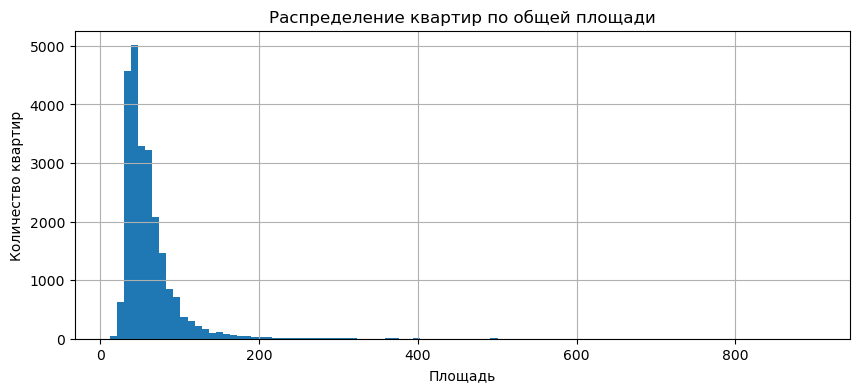

In [32]:
print(data['total_area'].describe())
data.hist('total_area', bins=100, figsize=(10, 4))
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по общей площади');

Распределение вполне ожидаемое - средняя площадь 60 кв. метров, медианная 52. Большинство объектов до 150 квадратных метров, есть и выше - это можно объяснить существованием элитной недвижимости, аппартаментов или коммунальных квартир. Максимальное значение - 900 - резко выделяется. Посмотрим повнимательнее:

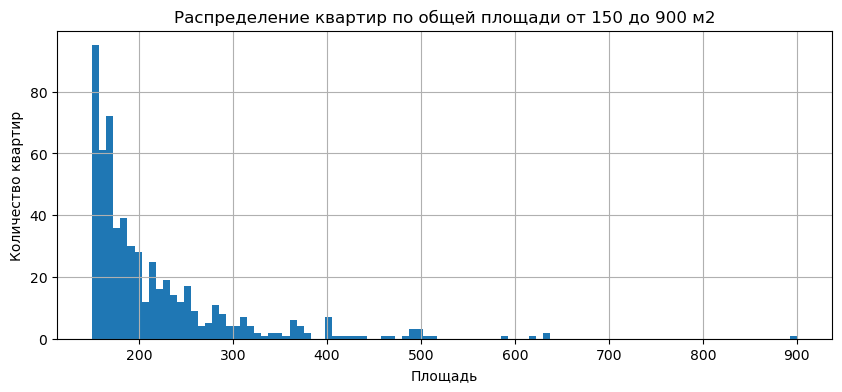

In [33]:
data.hist('total_area', bins=100, range=(150, 900), figsize=(10, 4))
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по общей площади от 150 до 900 м2');

Возможно, стоит отбросить слишком большие площади от 300 и больше - они нетипичны для выборки. 

**Жилая площадь**

count    23650.000000
mean        35.064375
std         22.949927
min          2.000000
25%         19.000000
50%         30.300000
75%         42.800000
max        435.172414
Name: living_area, dtype: float64


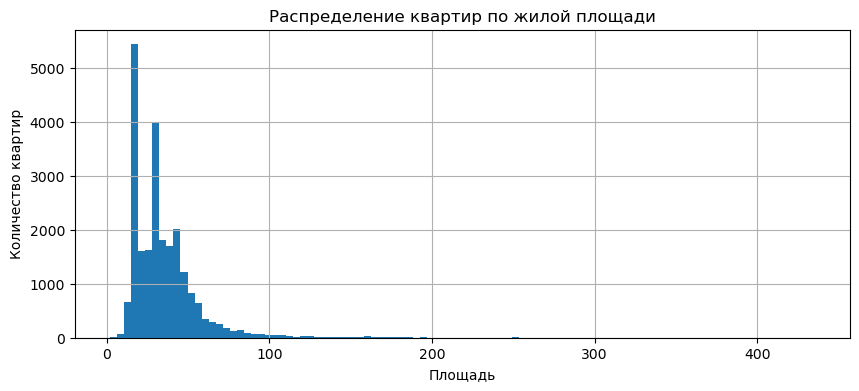

In [34]:
print(data['living_area'].describe())
data.hist('living_area', bins=100, figsize=(10, 4))
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по жилой площади');

С одной стороны, ожидаемо, ведь мы уже работали с этим параметром и аномалиями в нём (приняли за правило - 80% от общей для пропусков значений). Средняя 35, медианная 30. Вот только опять что-то с максимальной - 435. Возможно аномалия, а возможно потерянная запятая, как в потолках. Приблизим, руководствуясь нашим правилом:

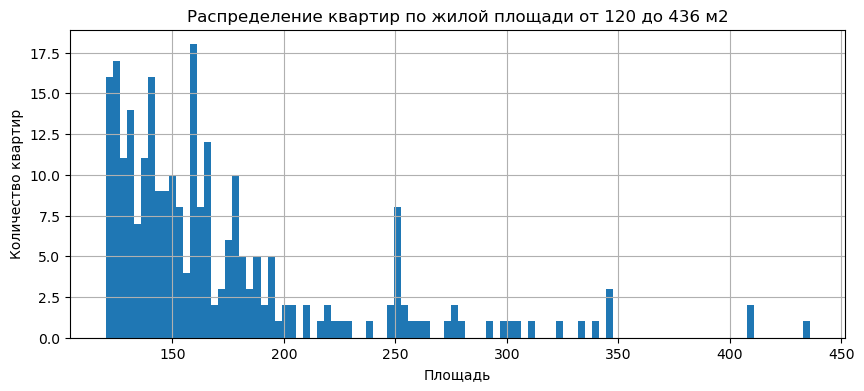

In [35]:
data.hist('living_area', bins=100, range=(120, 436), figsize=(10, 4))
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по жилой площади от 120 до 436 м2');

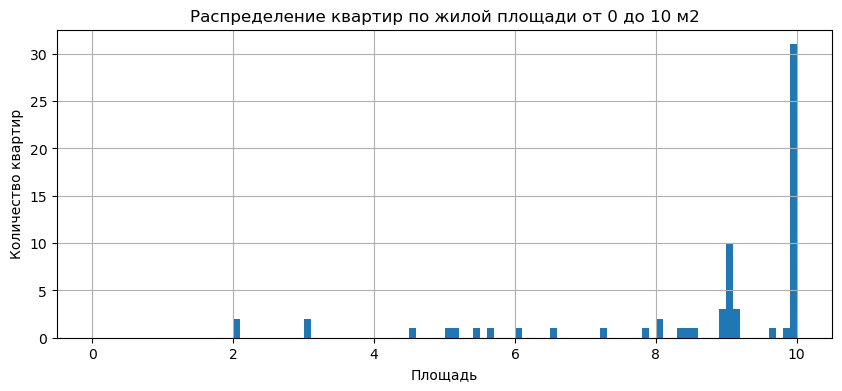

In [36]:
data.hist('living_area', bins=100, range=(0, 10), figsize=(10, 4))
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по жилой площади от 0 до 10 м2');

Когда исключений становится больше, чем правил, они меняются местами. Возможно, стоит действительно отбросить те, что меньше 10 и больше 250, но помним про свободные планировки и студии , а потому приравняем к общей (300).

**Площадь кухни**

count    23650.000000
mean        10.853251
std          6.555718
min          0.000000
25%          7.100000
50%          9.434071
75%         12.000000
max        123.860140
Name: kitchen_area, dtype: float64


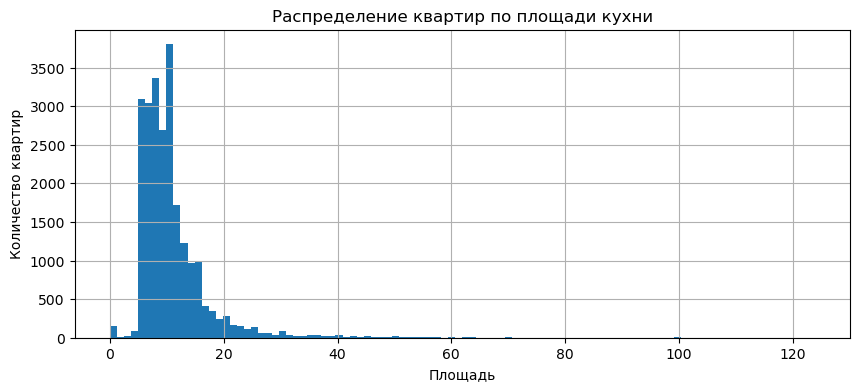

In [37]:
print(data['kitchen_area'].describe())
data.hist('kitchen_area', bins=100, figsize=(10, 4))
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по площади кухни');

Тоже, вполне ожидаемо, средняя 10,85, медиана 9,43. Можно было бы обратить внимание на минимальное 0, но мы помним про студии, где, как показала проверка, кухонь нет. А вот максимальная 124 уже не так смущает, но мы "держим на карандаше" и на всякий случай приблизим:

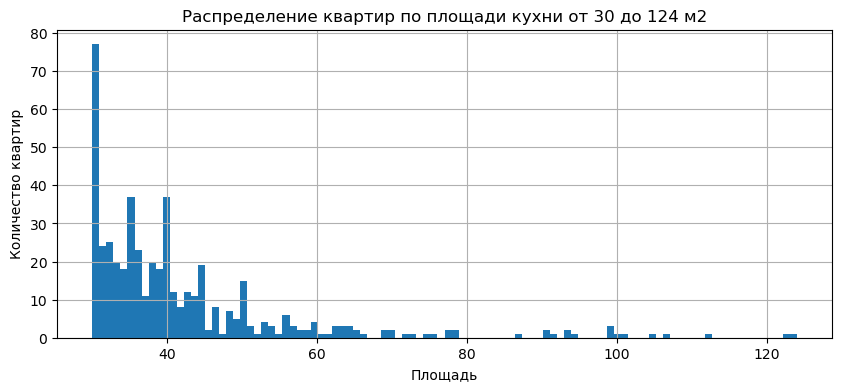

In [38]:
data.hist('kitchen_area', bins=100, range=(30, 124), figsize=(10, 4))
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по площади кухни от 30 до 124 м2');

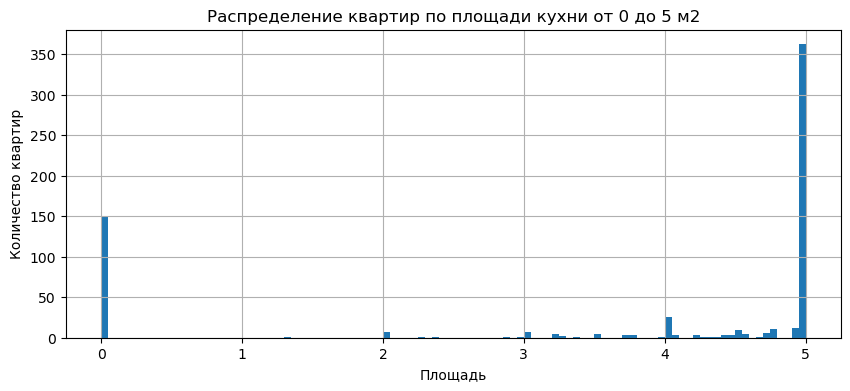

In [39]:
data.hist('kitchen_area', bins=100, range=(0, 5), figsize=(10, 4));
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по площади кухни от 0 до 5 м2');

Случаи подтверждают желание исключать выбивающиеся большие значения - они практически единичны. Ограничимся 50. Также мы помним, что изначально площадь кухни у студий отсутствовала и мы заменили её на 0, а это значит, что все малые значения больше нуля, но меньше 5 принадлежат не студиям.

**Цена объекта** - для удобства сместим несколько нулей - посчитаем в тысячах рублей:

count     23650.000000
mean       6541.126898
std       10896.399175
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6799.000000
max      763000.000000
Name: last_price, dtype: float64


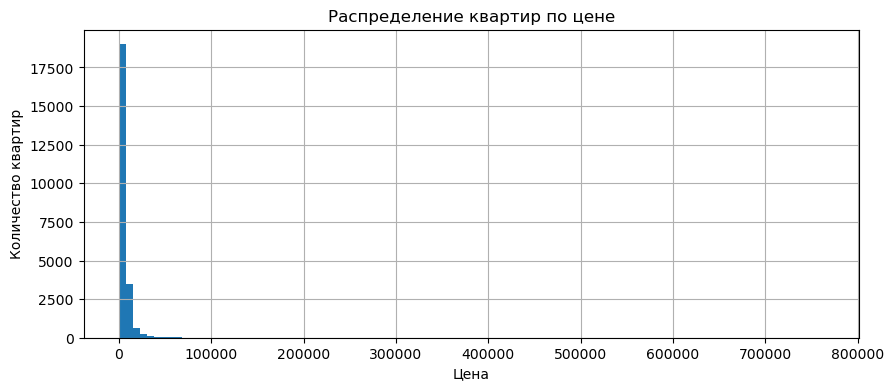

In [40]:
data['last_price'] = data['last_price'] / 1000
print(data['last_price'].describe())
data.hist('last_price', bins=100, figsize=(10, 4))
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по цене');

А вот тут уже интереснее, при средней 6,5 млн и медианной 4,6 млн - у нас минимальная 12 тысяч, а максимальная 763 млн... Видим, что снижение идёт к 20 млн. Остановимся поподробнее:

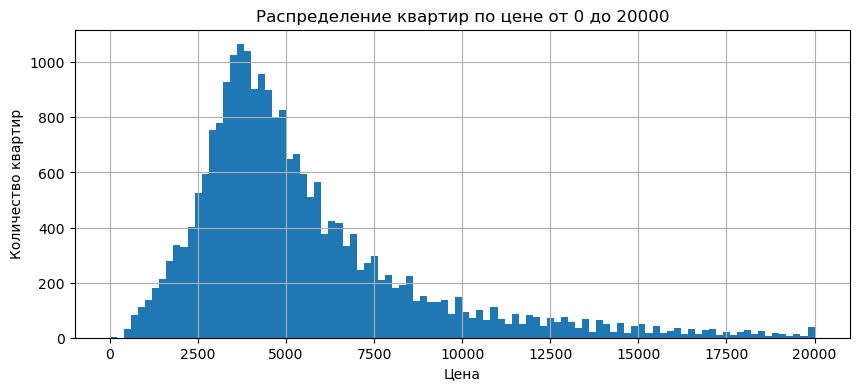

In [41]:
data.hist('last_price', bins=100, range=(0, 20000), figsize=(10, 4))
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по цене от 0 до 20000');

А не совпадение ли это:

In [42]:
data[data['last_price'] == 763000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
12971,19,763000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,...,530.0,3.0,756.0,33.0,1907.5,5,9,2017,последний,4.0


Около 1.9 млн за квадратный метр. При этом ни по одной из площадей это не самая большая квартира. На заметку возьмём. И да очень высоких значений снова единицы. Но и терять много нет смысла - 50000 установим пределом.

**Количество комнат**

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


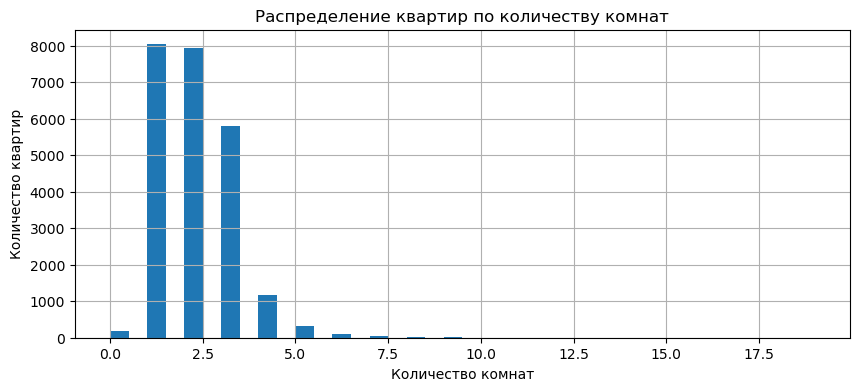

In [43]:
print(data['rooms'].describe())
data.hist('rooms', bins=19*2, figsize=(10, 4))
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по количеству комнат');

Тоже ожидаемо - средняя и медианная 2, минимальное 0 - вероятно, так указывали пользователи на студии или свободные планировки, большинство значений от 1 до 5, максимальная 19, нас опять тянет к большим цифрам (или коммунальным кварирам?).

In [44]:
data[data['rooms'] == 19]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
14498,6,32250.0,374.6,2018-06-09,19,2.65,5,264.5,2,False,...,NaN,2.0,548.0,114.0,86.09,5,6,2018,средний,4.0


Как ни странно, другая. Ограничимся 7 комнатами.

**Высота потолков**

count    23650.000000
mean         2.698087
std          0.242448
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64


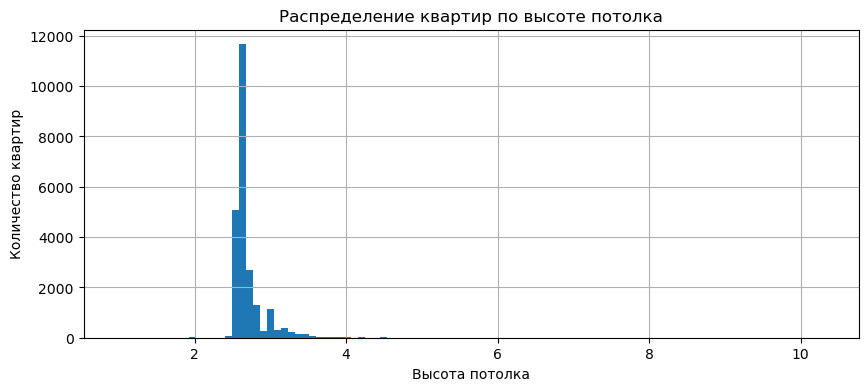

In [45]:
print(data['ceiling_height'].describe())
data.hist('ceiling_height', bins=100, figsize=(10, 4))
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по высоте потолка');

С ней мы уже работали ранее, устранив артефакты еще на начальном этапе, поэтому ничего необычного сейчас не увидим, средняя и медианная очень близки и логичны. Ранее мы обнаруживали, что есть значения больше 20 и 30 м, и максимальная была 100. По предположению, при заполнении данных пользователи могли забыть про запятую. Смущает лишь, что есть квартиры высотой 1 м, и, возможно, 10,3 м.

In [46]:
data[data['ceiling_height'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
5712,5,1500.0,42.8,2017-08-14,2,1.20,2,27.5,1,False,...,NaN,NaN,NaN,248.0,35.05,0,8,2017,первый,NaN
15061,19,5600.0,56.4,2018-05-11,2,1.40,14,32.4,5,False,...,NaN,0.0,NaN,315.0,99.29,4,5,2018,средний,14.0
16934,5,4100.0,40.0,2017-10-17,1,1.75,37,17.4,5,False,...,NaN,3.0,80.0,71.0,102.50,1,10,2017,средний,20.0
22590,16,6000.0,55.0,2018-10-31,2,1.00,12,32.4,7,False,...,293.0,2.0,289.0,13.0,109.09,2,10,2018,средний,14.0


In [47]:
data[data['ceiling_height'] > 7]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
3474,3,1400.0,30.0,2018-03-16,1,8.0,5,15.3,2,False,...,NaN,NaN,NaN,125.0,46.67,4,3,2018,средний,NaN
5863,20,5650.0,45.0,2018-08-15,1,8.3,16,19.3,14,False,...,NaN,1.0,613.0,14.0,125.56,2,8,2018,средний,11.0
15743,14,5600.0,67.0,2016-11-11,3,8.0,16,41.0,1,False,...,723.0,0.0,NaN,474.0,83.58,4,11,2016,первый,11.0
17442,0,5350.0,54.0,2015-06-16,2,8.0,5,29.0,2,False,...,NaN,0.0,NaN,469.0,99.07,1,6,2015,средний,28.0
22309,20,5300.0,45.0,2017-09-30,1,10.3,16,15.5,15,False,...,440.0,2.0,450.0,136.0,117.78,5,9,2017,средний,12.0
22869,0,15000.0,25.0,2018-07-25,1,10.0,5,11.2,5,True,...,223.0,3.0,30.0,19.0,600.00,2,7,2018,последний,8.0


В первом варианте квартира 1 м всего одна, с логичными данными площадей, так что это, вероятно, опечатка, но есть ещё 3, которые больше, но менее 2 метров высоты. Во втором - 6 (причём не попавшие под нашу замену, они были такими изначально)  - самая высокая на 45 кв.м площади всего 15,5 жилых - уникальная 3-этажная квартира или аномалия? Возможно, мы их удалим, как и те, что меньше 2,2 метров, как думали изначально - это могут быть хоз.помещения которые управляющая компания решила продать.

**Тип этажа квартиры** 

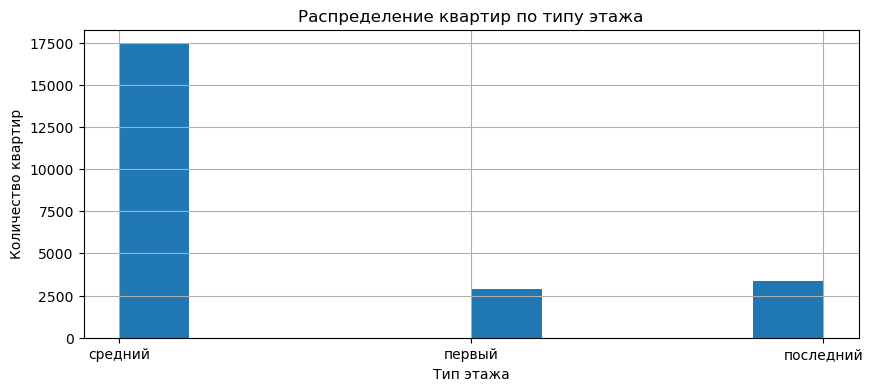

In [48]:
data['floor_type'].hist(figsize=(10, 4))
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по типу этажа');

Ничего необычного - сколько бы не было этажей в доме, первых и последних - по одному, а вот средних много.

**Общее количество этажей в доме**

count    23650.000000
mean        10.685370
std          6.596525
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


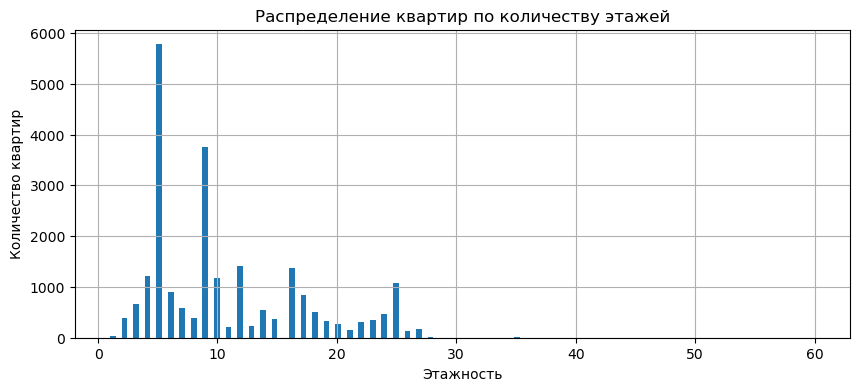

In [49]:
print(data['floors_total'].describe())
data.hist('floors_total', bins=61*2, figsize=(10, 4))
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по количеству этажей');

Среднее 10, медианное 9, больше всего значений в 5- и 9-этажках, но встречаются и высотки. А вот 60-этажное здание - либо артефакт, либо опечатка. Последним значимым количеством обладает 25.

In [50]:
data[data['floors_total'] == 60]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
2253,12,3800.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,342.0,3.0,614.0,166.0,83.52,3,6,2018,средний,49.0


Квартира такая одна, на 4 этаже из 60, подозрительно что в 49 км от центра.

**Расстояние до центра города** - помним, что у нас имеется 5511 пропусков в этом столбце, точно восстановить которые - невозможно

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


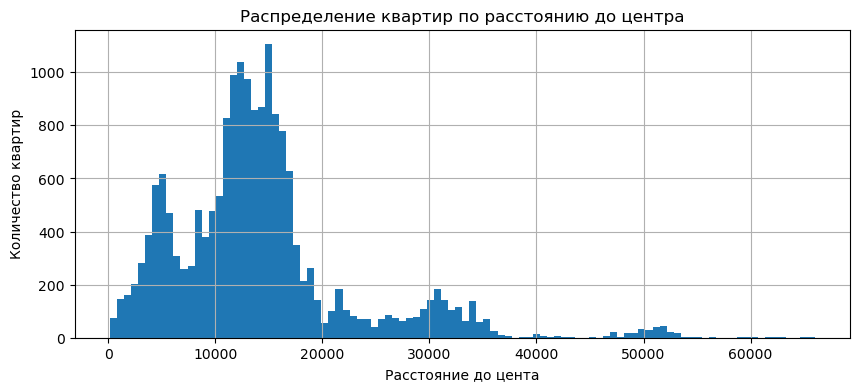

In [51]:
print(data['city_centers_nearest'].describe())
data.hist('city_centers_nearest', bins=100, figsize=(10, 4))
plt.xlabel('Расстояние до цента')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по расстоянию до центра');

В среднем 15 км, 13 по медиане. При этом видим 2 пика - в районе 5 км и 13-17 км. А вот свыше 20 - уже малые значения, хотя отбрасывать лучше от 55 км, чтобы картину не портить совсем.

**Расстояние до ближайшего парка** - здесь пропусков еще больше 15586 при общем датафрейме 23650. Как было указано выше, данные восстановить невозможно, плюс они могли меняться со временем. Для наглядности посмотрим:

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


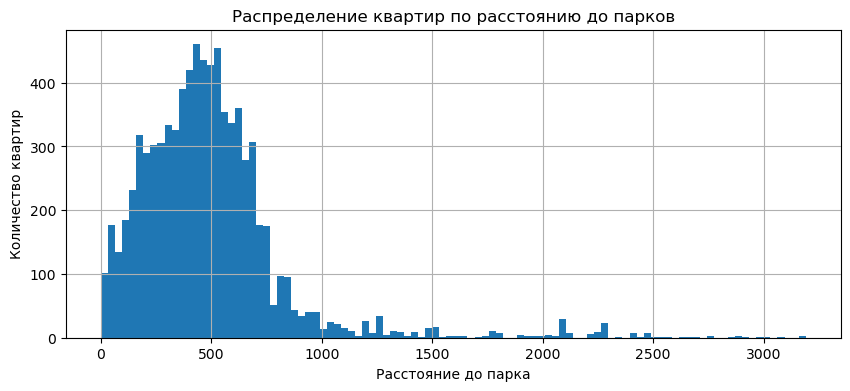

In [52]:
print(data['parks_nearest'].describe())
data.hist('parks_nearest', bins=100, figsize=(10, 4));
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по расстоянию до парков');

Расстояния у нас в метрах, среднее 491, медианное 455, максимальное 3190, по логике стоило бы отсекать то, что свыше 1000, но данных итак немного.

**3.2. Как быстро продавались квартиры**

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


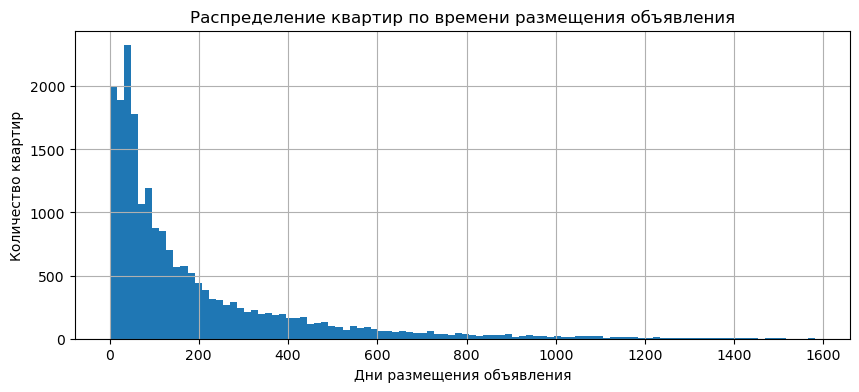

In [53]:
print(data['days_exposition'].describe())
data.hist('days_exposition', bins=100, figsize=(10, 4))
plt.xlabel('Дни размещения объявления')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по времени размещения объявления');

Среднее 181, медианная 95, при этом есть квартиры, которые продались за 1 день, а есть за 1580 (4 года 4 месяца). Также помним, что у нас остались пропуски в этом столбце - объявления могли быть сняты и без продажи или по другим причинам.

Посчитаем значения, сгруппировав по длительности:

In [54]:
data.groupby('days_exposition')['first_day_exposition'].count().sort_values(ascending=False).head(15)

days_exposition
45.0    879
60.0    538
7.0     234
30.0    208
90.0    203
4.0     174
3.0     158
5.0     152
14.0    148
9.0     142
20.0    139
8.0     139
44.0    138
11.0    135
18.0    129
Name: first_day_exposition, dtype: int64

Самые большие цифры - 45, 60 - пиковые значения, но и дальше - 7, 30, 90 - больше похожи на правила размещения объявлений, чем на продажи. А вот явное снижение по графику мы видим с 500 дней. Пожалуй это будем считать очень долгими продажами. Посмотрим на самые короткие продажи:

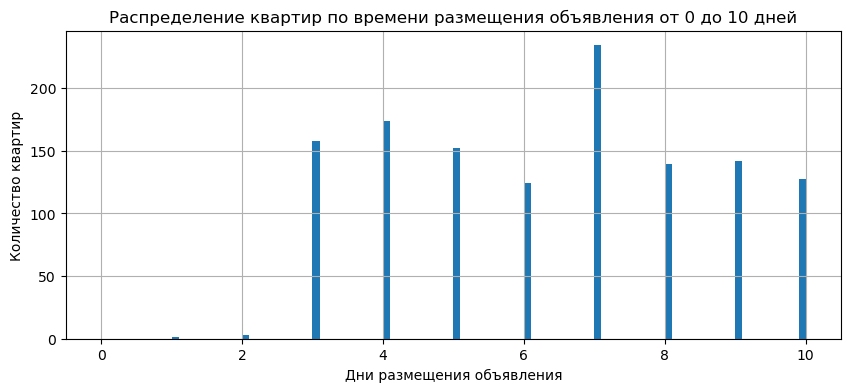

In [55]:
data.hist('days_exposition', bins=100, range=(0, 10), figsize=(10, 4))
plt.xlabel('Дни размещения объявления')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по времени размещения объявления от 0 до 10 дней');

In [56]:
data[data['days_exposition'] < 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
1632,19,4000.0,49.9,2019-05-01,2,2.50,9,25.000000,1,False,...,20.0,1.0,681.0,1.0,80.16,2,5,2019,первый,14.0
13061,20,6100.0,51.4,2019-04-29,2,3.00,5,31.700000,4,False,...,NaN,0.0,NaN,2.0,118.68,0,4,2019,средний,9.0
16053,4,4070.0,45.1,2019-04-30,2,2.65,5,22.700000,3,False,...,485.0,0.0,NaN,2.0,90.24,1,4,2019,средний,12.0
16212,0,7806.0,25.0,2019-04-30,1,3.00,5,17.241379,5,False,...,NaN,0.0,NaN,2.0,312.24,1,4,2019,последний,10.0


Всего 4 квартиры с аномально низкими сроками продажи. Такое возможно, но в выборке мы их исключим

**3.3. Исследование стоимости квартир**

Опираясь на рассчёты, создадим новый датафрейм, отбросив то, что посчитали лишним:

In [57]:
good_data = data.loc[(data['total_area'] <= 300) & (data['living_area'] <= 300) & (data['living_area'] >= 9)
                     & (data['kitchen_area'] <= 50)
                     & (data['last_price'] <= 50000) & (data['rooms'] <= 7) 
                     & (data['ceiling_height'] >= 2.2) & (data['ceiling_height'] <= 7)
                     & (data['floors_total'] <= 25) & (data['last_price'] >= 100)
                     & (data['days_exposition'] != 1) & (data['days_exposition'] != 2)]
good_data = good_data.reset_index(drop=True)
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,...,482.0,2.0,755.0,NaN,120.37,3,3,2019,средний,16.0
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,...,NaN,0.0,NaN,81.0,82.92,1,12,2018,первый,19.0
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,...,90.0,2.0,574.0,558.0,92.79,3,8,2015,средний,14.0
3,2,10000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,...,112.0,1.0,48.0,121.0,100.00,1,6,2018,средний,8.0
4,10,2890.0,30.4,2018-09-10,1,2.65,12,14.40000,5,False,...,NaN,NaN,NaN,55.0,95.07,0,9,2018,средний,NaN
5,5,7915.0,71.6,2019-04-18,2,2.65,24,49.37931,22,False,...,NaN,0.0,NaN,NaN,110.54,3,4,2019,средний,12.0
6,18,5400.0,61.0,2017-02-26,3,2.50,9,43.60000,7,False,...,NaN,0.0,NaN,289.0,88.52,6,2,2017,средний,15.0
7,5,5050.0,39.6,2017-11-16,1,2.67,12,20.30000,3,False,...,310.0,2.0,553.0,137.0,127.53,3,11,2017,средний,14.0
8,9,3300.0,44.0,2018-08-27,2,2.65,5,31.00000,4,False,...,NaN,0.0,NaN,7.0,75.00,0,8,2018,средний,52.0
9,10,3890.0,54.0,2016-06-30,2,2.65,5,30.00000,5,False,...,NaN,NaN,NaN,90.0,72.04,3,6,2016,последний,NaN


In [58]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23052 entries, 0 to 23051
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23052 non-null  int64         
 1   last_price            23052 non-null  float64       
 2   total_area            23052 non-null  float64       
 3   first_day_exposition  23052 non-null  datetime64[ns]
 4   rooms                 23052 non-null  int64         
 5   ceiling_height        23052 non-null  float64       
 6   floors_total          23052 non-null  int32         
 7   living_area           23052 non-null  float64       
 8   floor                 23052 non-null  int64         
 9   is_apartment          23052 non-null  bool          
 10  studio                23052 non-null  bool          
 11  open_plan             23052 non-null  bool          
 12  kitchen_area          23052 non-null  float64       
 13  balcony         

Таким образом мы уменьшили датасет менее, чем на 3%, при этом очистили его от аномалий весьма серьёзно.

Проверим, какие параметры влияют на стоимость квартир и как серьёзно.
Нам необходимо узнать, зависит ли стоимость от:
- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

In [59]:
good_data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms',]].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.775688,0.680201,0.599165,0.487938
total_area,0.775688,1.000000,0.935210,0.609418,0.787458
living_area,0.680201,0.935210,1.000000,0.437768,0.851798
kitchen_area,0.599165,0.609418,0.437768,1.000000,0.293785
rooms,0.487938,0.787458,0.851798,0.293785,1.000000


Сильная корреляция цены есть с общей площадью, что более чем логично, чуть меньшая с жилой, средняя  с площадью кухни и количеством комнат. Практически отсутствует с датой размещения. Рассмотрим как зависит цена квартир с разным количеством комнат от этажа квартиры:

In [60]:
price_floor_type = good_data.pivot_table(index='floor_type', values='last_price', columns='rooms')
price_floor_type

rooms,0,1,2,3,4,5,6,7
floor_type,,,,,,,,
первый,2557.555556,3221.654813,4176.504227,5621.415262,7610.631548,11102.413867,15915.775000,25230.000000
последний,3230.400000,3375.269656,4755.093589,7322.665709,11558.108691,18093.346471,19114.000000,18024.545455
средний,3033.246855,3971.289361,5949.888621,8177.245066,11793.954175,15985.536063,18343.096552,20151.250000


По этому выводу мы можем и закрыть вопрос с количеством комнат. В большинстве случаев первые этажи дешевле остальных, кроме 7 комнатных (возможно, потому что их можно использовать как отели или хостелы. Последние показывают стабильно средние цены, за малым исключением студий и 5-комнатных квартир. У средних же этажей, ожидаемо цены самые высокие. И да, с количествм комнат растёт и цена.

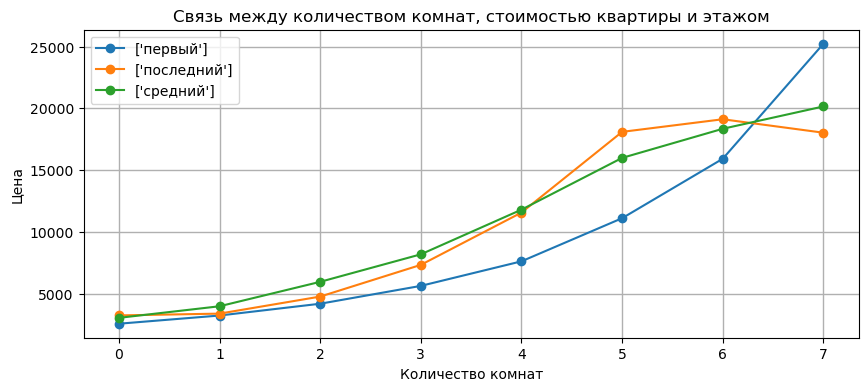

In [61]:
fig, ax = plt.subplots(figsize=(10, 4))
for i in price_floor_type.index:
    ax.plot(price_floor_type.columns, price_floor_type.loc[i], marker ='o', label=[i])
plt.xticks(price_floor_type.columns)
plt.legend(loc='upper left')
plt.grid(linestyle='-', linewidth=1)
plt.title('Связь между количеством комнат, стоимостью квартиры и этажом')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

Вернёмся к площадям. Самая большая корреляция у нас была с общей площадью, с неё и начнём:

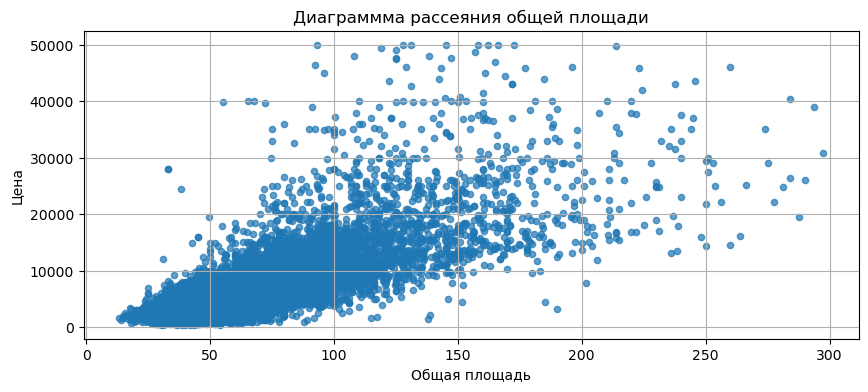

In [62]:
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True)
plt.title('Диаграммма рассеяния общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена');

Вот почему корреляция и не равна 1 - в начале с ростом площади растёт и цена, но потом разброс этих показателей увелиливается. Можно предположить, что фактор размера не определяющий - ведь у нас есть разные населённые пункты, а могут быть и неучтённые факторы, например, наличие ремонта. Сделаем тоже самое для жилой площади и площади кухни:

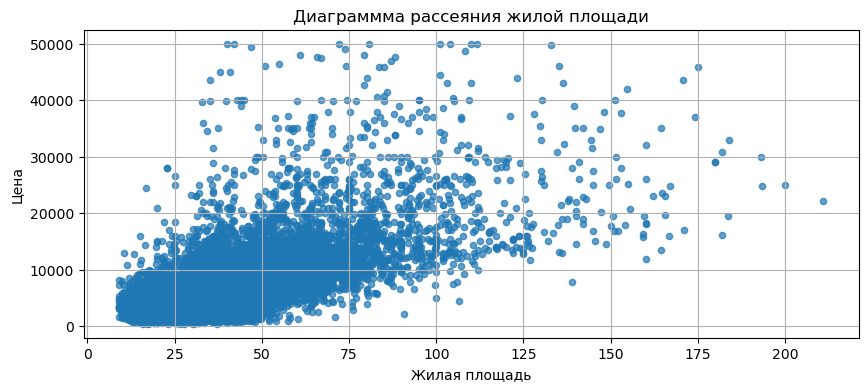

In [63]:
good_data.plot(x='living_area', y='last_price', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True)
plt.title('Диаграммма рассеяния жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена');

Очень похоже на предыдущую - неудивительно, ведь корреляция между жилой и общей площадью самая высокая, как мы видим из таблицы выше. И покупатели чаще обращают внимание именно на жилую, чем на общую - жить же они планируют не в коридорах.

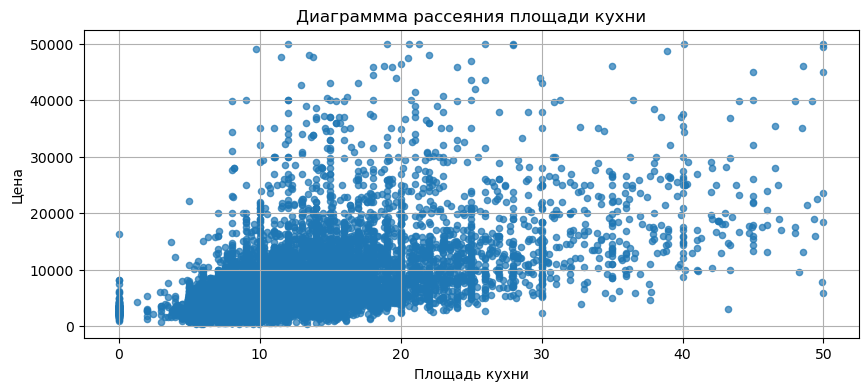

In [64]:
good_data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True)
plt.title('Диаграммма рассеяния площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена');

Как мы помним, самая низкая корреляция цены среди площадей - именно с площадью кухни. Именно поэтому мы видим, что основная масса точек больше "прижимается" вниз. Но и рассеивается на ша диаграмма сильно - то есть не все пользователи закрывают глаза на размер кухни, у многих квартир, как мы помним, может быть большая кухня, а также точки на значении 0 напоминают нам о студиях.

Посмотрим, что у нас с датами размещения объявлений, помня, что корреляция во всех 3 столбцах близка к нулю:

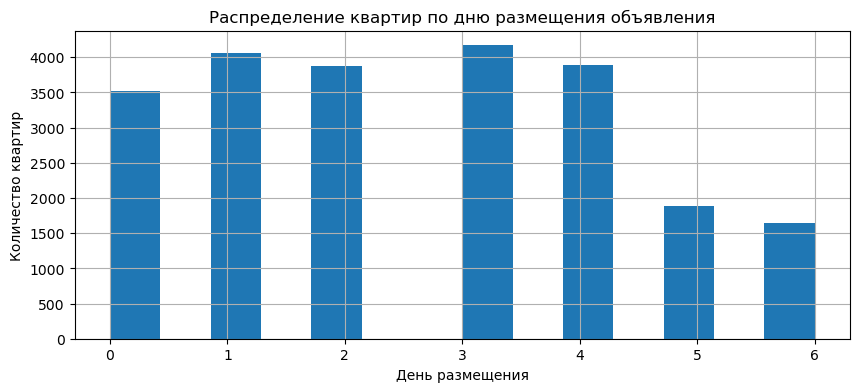

In [65]:
good_data.hist('exposition_day', bins=7*2, figsize=(10, 4))
plt.title('Распределение квартир по дню размещения объявления')
plt.xlabel('День размещения')
plt.ylabel('Количество квартир');

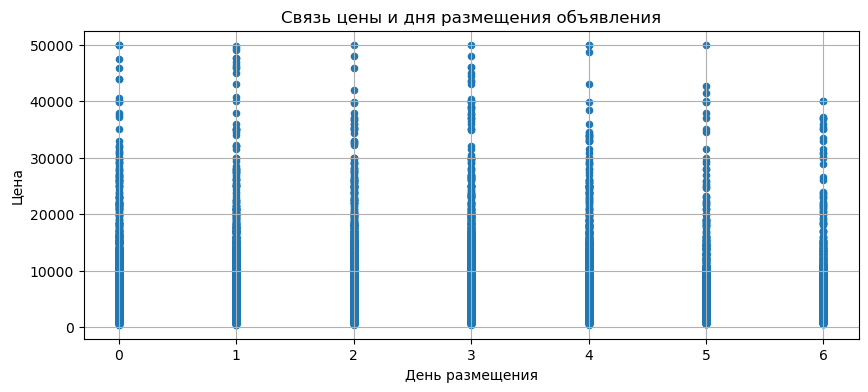

In [66]:
good_data.plot(x='exposition_day', y='last_price', kind='scatter', figsize=(10, 4), grid=True)
plt.title('Связь цены и дня размещения объявления')
plt.xlabel('День размещения')
plt.ylabel('Цена');

По дням недели - больше всего объявлений мы видим в будни, что логично - в выходные люди меньше занимаются делами. Плюс, если учесть, что агрегаторы объявлений и агенства недвижимости тоже больше работают в будни - картина наглядна. При этом можем заметить, что самые дорогие не публиковались в воскресенье.

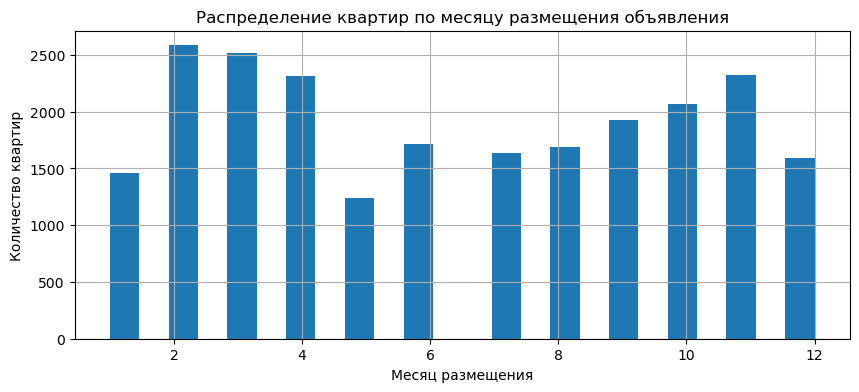

In [67]:
good_data.hist('exposition_month', bins=12*2, figsize=(10, 4));
plt.title('Распределение квартир по месяцу размещения объявления')
plt.xlabel('Месяц размещения')
plt.ylabel('Количество квартир');

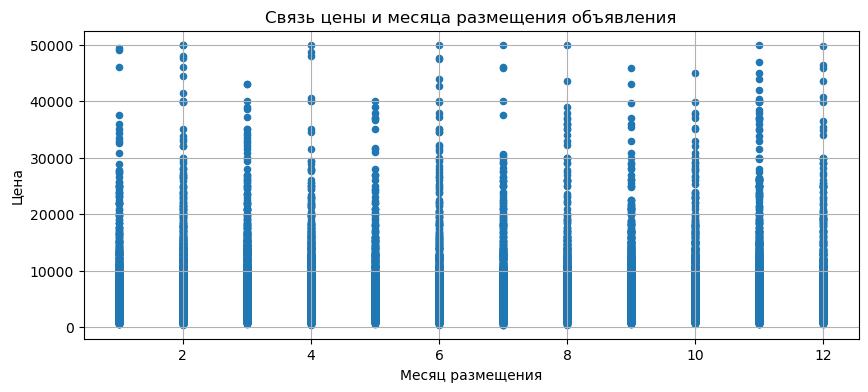

In [68]:
good_data.plot(x='exposition_month', y='last_price', kind='scatter', figsize=(10, 4), grid=True)
plt.title('Связь цены и месяца размещения объявления')
plt.xlabel('Месяц размещения')
plt.ylabel('Цена');

По месяцам - меньше всего объявлений в январе, мае, декабре - связано, скорее всего с выходными и праздничными днями. Верхний сегмент цен самый малый в мае.

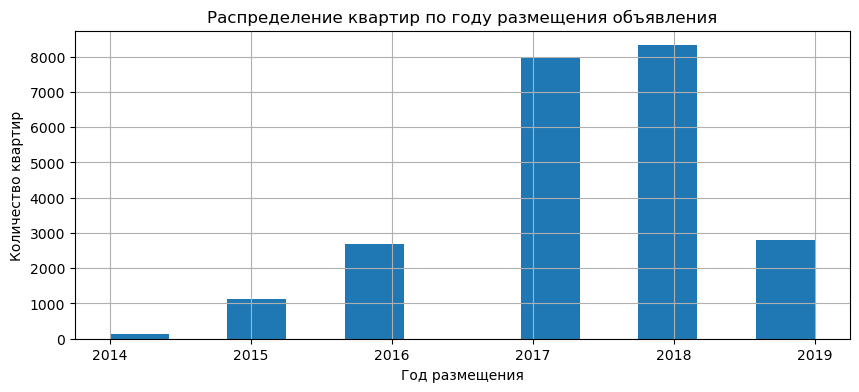

In [69]:
good_data.hist('exposition_year', bins=6*2, figsize=(10, 4))
plt.title('Распределение квартир по году размещения объявления')
plt.xlabel('Год размещения')
plt.ylabel('Количество квартир');

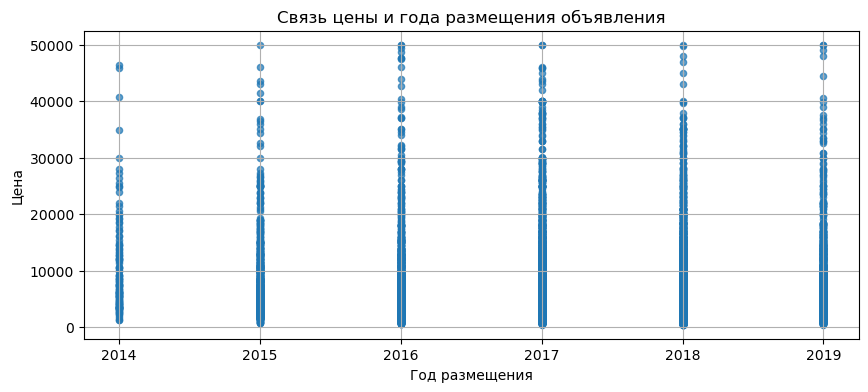

In [70]:
good_data.plot(x='exposition_year', y='last_price', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True)
plt.title('Связь цены и года размещения объявления')
plt.xlabel('Год размещения')
plt.ylabel('Цена');

По годам - меньше всего объявлений в начальном для исследования 2014-м. Как раз тогда был очередной виток кризиса в стране, пользователи могли предпочесть подождать с крупными покупками. Дальше наметился рост, снизившийся только к 2019-у. Возможно, просто перенасытился рынок. По ценам - в том же 2014-м мы видим меньше значений в высоких сегментах - вполне вероятно, что сами цены были ниже.

Посмотрим на динамику. Для начала посмотрим на средние цены по дням недели:

In [71]:
day_price = good_data.pivot_table(index='exposition_day', values='last_price')
day_price

,last_price
exposition_day,
0,5987.587113
1,5942.301247
2,6048.983491
3,6120.755204
4,5793.049524
5,5674.027424
6,5770.821306


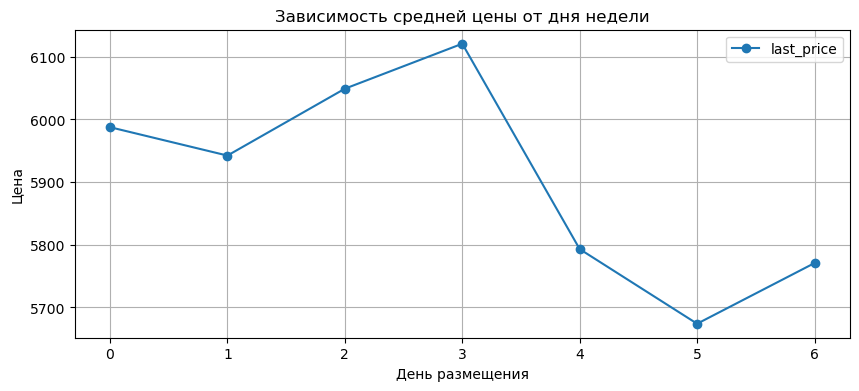

In [72]:
day_price.plot(style='o-', title='Зависимость средней цены от дня недели', figsize=(10, 4), grid=True)
plt.xlabel('День размещения')
plt.ylabel('Цена');

Теперь, как средняя цена менялась по месяцам:

In [73]:
month_price = good_data.pivot_table(index='exposition_month', values='last_price')
month_price

,last_price
exposition_month,
1,6023.077526
2,5967.192816
3,5835.997882
4,5919.759952
5,5900.779453
6,5811.969353
7,5927.968611
8,5958.620520
9,5997.070923


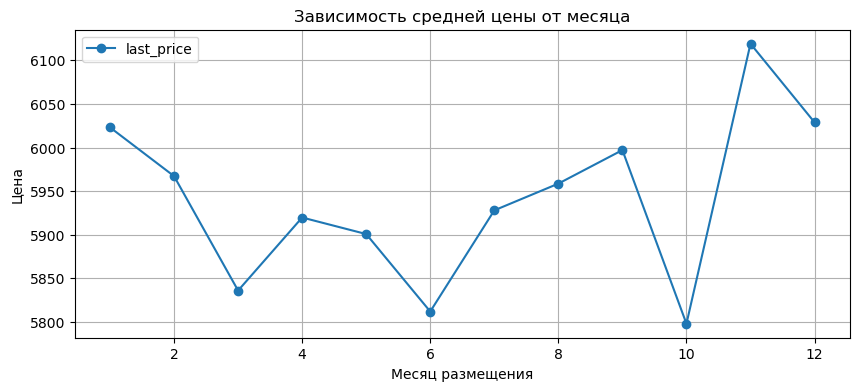

In [74]:
month_price.plot(style='o-', title='Зависимость средней цены от месяца', figsize=(10, 4), grid=True)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена');

И тоже самое для года публикации:

In [75]:
year_price = good_data.pivot_table(index='exposition_year', values='last_price')
year_price

,last_price
exposition_year,
2014,10552.369832
2015,7046.920379
2016,6046.819504
2017,5844.855400
2018,5663.165209
2019,6263.996983


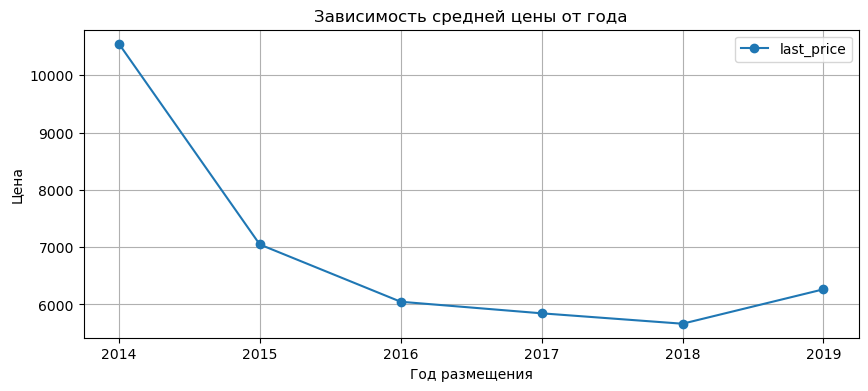

In [76]:
year_price.plot(style='o-', title='Зависимость средней цены от года', figsize=(10, 4), grid=True)
plt.xlabel('Год размещения')
plt.ylabel('Цена');

График кажется неполным. Добавим несколько значений:
- количество объявлений
- средние площади (ведь у площади с ценой самая высокая корреляция)    

In [77]:
year_count = good_data.pivot_table(index='exposition_year', values='last_price', aggfunc='count')
year_stat = year_price.merge(year_count, on='exposition_year')
year_stat

,last_price_x,last_price_y
exposition_year,,
2014,10552.369832,131
2015,7046.920379,1136
2016,6046.819504,2698
2017,5844.855400,7959
2018,5663.165209,8318
2019,6263.996983,2810


In [78]:
year_area = good_data.pivot_table(index='exposition_year', values='total_area')
year_stat_final = year_stat.merge(year_area, on='exposition_year')
year_stat_final.columns = ['Средняя цена', 'Количество объявлений', 'Средняя площадь']
year_stat_final

,Средняя цена,Количество объявлений,Средняя площадь
exposition_year,,,
2014,10552.369832,131,82.256565
2015,7046.920379,1136,67.791743
2016,6046.819504,2698,60.252109
2017,5844.855400,7959,58.783135
2018,5663.165209,8318,56.828447
2019,6263.996983,2810,57.685480


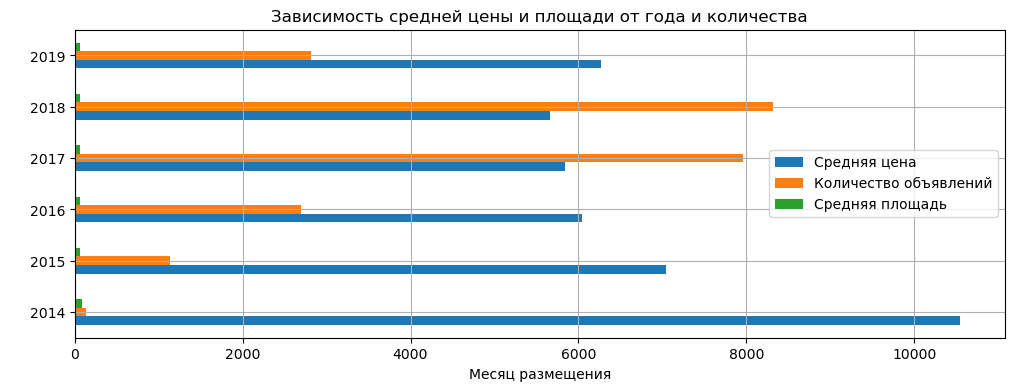

In [79]:
year_stat_final.plot(kind='barh', style='o-', figsize=(12, 4), grid=True)
plt.title('Зависимость средней цены и площади от года и количества')
plt.xlabel('Месяц размещения')
plt.ylabel(' ');

**Промежуточный вывод:**

В среднем, с годами цена снижалась, а количество объявлений только росло. Это объясняется тем, что в 2014 было меньше всего объявлений - и влияние высоких цен и больших площадей на средние сказывалось сильнее. Чем больше объявлений становилось с годами, тем "плотнее" становились показатели. В 2019 году снова наметился рост цены, но, как мы видели выше, количество объявлений уменьшилось. Появлялось всё больше квартир более низкого и среднего ценового сегмента, но и квартиры с каждым годом дорожают - при схожей средней площади с 2018-м годом цены выше.

Посмотрим на динамику продаж - как быстро продавались квартиры с течением времени:

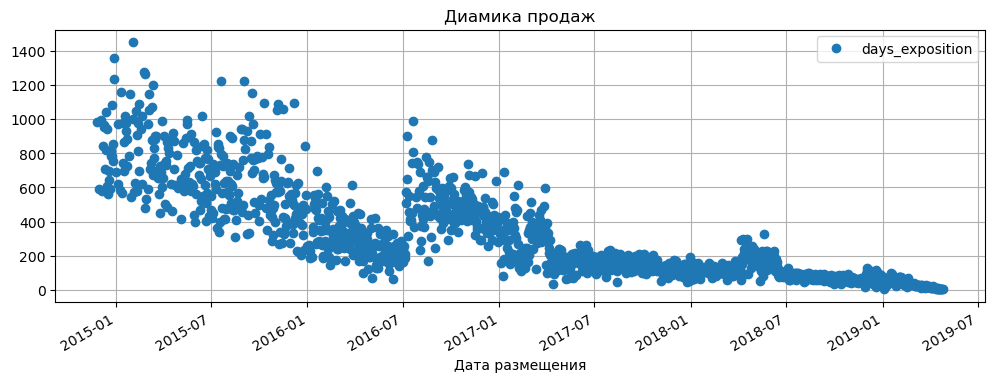

In [80]:
exposition_dynamics = good_data.pivot_table(index='first_day_exposition', values='days_exposition')
exposition_dynamics.plot(style='o', title='Диамика продаж', figsize=(12, 4), grid=True);
plt.xlabel('Дата размещения');

**Вывод**

Среди рассматриваемы параметров самыми значимыми, ожидаемо, оказались общая и жалая площади, чуть меньше на цену влияют площадь кухни и количество комнат - мы помним, что в выборке есть и студии и квартиры со свободной планировкой. Также, рассмотренные вместе параметры количества комнат и высоты этажа подтвердили, как тенденцию с площадью, так и предпочтения пользователей выбирать не первый этаж, а низкий спрос снижает цену. Ну и как мы отмечали выше - сколько бы этажей в доме не было - первый всего один.

При этом динамика продаж показала, что в начале рассматриваемого периода квартиры продавались дольше. Это может быть связано с нашим предположением о кризисе в 2014-м году. В середине-конце 2016 года случился небольшой "застой" (помним про перенасыщавшийся рынок). Далее скорость продаж только возростала. Также можно сделать вывод, что чем меньше квартира (и её цена, соответственно) - тем быстрее она продаётся.

Дороже всего квартиры, выложенные на продажу в будни, а дешевле всего - в выходные.
Самые высокие цены на квартиры в зимний период, ниже всего в начале весны.

**3.4. Популярные районы.**

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.
Первые 10 по количеству объявлений, для удобства сохраним в переменной:

In [81]:
best_sellers = good_data.groupby('locality_name')['price_mq'].count().sort_values(ascending=False).head(10)
best_sellers

locality_name
Санкт-Петербург      15361
поселок Мурино         475
поселок Шушары         435
Всеволожск             397
Пушкин                 364
Колпино                337
Гатчина                307
деревня Кудрово        298
Выборг                 235
поселок Парголово      206
Name: price_mq, dtype: int64

Как и ожидалось, большинство квартир в самом Санкт-Петербурге (83.4%), остальные в Ленобласти.

In [82]:
data_best_sellers = good_data.query('locality_name in @best_sellers.index')
data_best_sellers.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.00000,8,False,...,482.0,2.0,755.0,NaN,120.37,3,3,2019,средний,16.0
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.60000,1,False,...,NaN,0.0,NaN,81.0,82.92,1,12,2018,первый,19.0
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.30000,4,False,...,90.0,2.0,574.0,558.0,92.79,3,8,2015,средний,14.0
3,2,10000.0,100.0,2018-06-19,2,3.03,14,32.00000,13,False,...,112.0,1.0,48.0,121.0,100.00,1,6,2018,средний,8.0
5,5,7915.0,71.6,2019-04-18,2,2.65,24,49.37931,22,False,...,NaN,0.0,NaN,NaN,110.54,3,4,2019,средний,12.0
6,18,5400.0,61.0,2017-02-26,3,2.50,9,43.60000,7,False,...,NaN,0.0,NaN,289.0,88.52,6,2,2017,средний,15.0
7,5,5050.0,39.6,2017-11-16,1,2.67,12,20.30000,3,False,...,310.0,2.0,553.0,137.0,127.53,3,11,2017,средний,14.0
11,1,4400.0,36.0,2016-06-23,1,2.65,6,17.00000,1,False,...,NaN,1.0,96.0,203.0,122.22,3,6,2016,первый,31.0
12,16,4650.0,39.0,2017-11-18,1,2.65,14,20.50000,5,False,...,590.0,1.0,296.0,19.0,119.23,5,11,2017,средний,14.0
13,11,6700.0,82.0,2017-11-23,3,3.05,5,55.60000,1,False,...,420.0,0.0,NaN,397.0,81.71,3,11,2017,первый,11.0


Нас интересуют: средняя цена квадратного метра в этих населённых пунктах (количество объявлений мы уже посчитали), а также населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [83]:
mq_stat = data_best_sellers.pivot_table(index='locality_name', values='price_mq').sort_values('price_mq', ascending=False)
mq_stat

,price_mq
locality_name,
Санкт-Петербург,112.099522
Пушкин,102.929698
деревня Кудрово,92.499295
поселок Мурино,85.817326
поселок Парголово,85.638010
поселок Шушары,78.912621
Колпино,75.333175
Гатчина,68.746319
Всеволожск,68.719295


Добавим в сводную таблицу наше количество объявлений для наглядности:

In [84]:
count_stat = data_best_sellers.pivot_table(index='locality_name', values='price_mq', aggfunc='count')
count_stat

,price_mq
locality_name,
Всеволожск,397
Выборг,235
Гатчина,307
Колпино,337
Пушкин,364
Санкт-Петербург,15361
деревня Кудрово,298
поселок Мурино,475
поселок Парголово,206


In [85]:
final_stat = mq_stat.merge(count_stat, on='locality_name')
final_stat.columns = ['Средняя цена кв.м', 'Количество объявлений']
final_stat

,Средняя цена кв.м,Количество объявлений
locality_name,,
Санкт-Петербург,112.099522,15361
Пушкин,102.929698,364
деревня Кудрово,92.499295,298
поселок Мурино,85.817326,475
поселок Парголово,85.638010,206
поселок Шушары,78.912621,435
Колпино,75.333175,337
Гатчина,68.746319,307
Всеволожск,68.719295,397


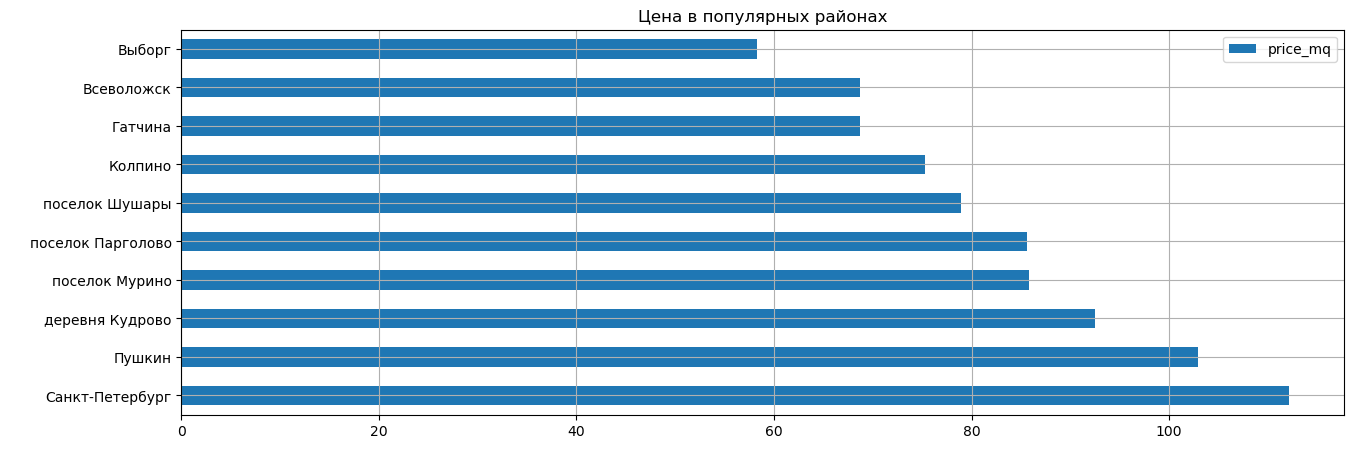

In [86]:
mq_stat.plot(kind='barh', style='o-', title='Цена в популярных районах', figsize=(15, 5), grid=True)
plt.xlabel(' ')
plt.ylabel(' ');

**Вывод**

Ожидаемо, самая высокая цена квадратного метра недвижимости среди рассмотренных нами 10 самых популярных населённых пунктов - в Санкт-Петербурге, где и больше всего объявлений. Самая Низкая - в Выборге, при том, почти вдвое меньше, хоть он и входит в десятку самых популярных населённх пунктов.

**3.5. Зависимость цены от расстояния до центра**

Нам необходимо рассчитать, как влияет на цену каждый километр до центра города в Санкт-Петербурге. Ранее мы уже создали столбец с расстоянием в километрах city_centers_km, округлив его значения до целых. Также, не забываем, что в этом столбце у нас имеются пропуски, восстановить которые нет возможности.

In [87]:
price_km = good_data.query('locality_name == "Санкт-Петербург"')
price_km = price_km.reset_index(drop=True)
stat_km = price_km.pivot_table(index='city_centers_km', values='last_price')
stat_km

,last_price
city_centers_km,
0.0,20035.528545
1.0,12830.184965
2.0,11987.362676
3.0,10175.811519
4.0,10956.282516
5.0,11519.756164
6.0,11705.433476
7.0,11331.554814
8.0,9054.326961


Из сводной таблицы мы получили 30 значений: от 0 - квартира расположена в центре, до 29 - соответственно 29 км от центра, а также среднюю стоимость квадратного метра в них, для наглядности построим график:

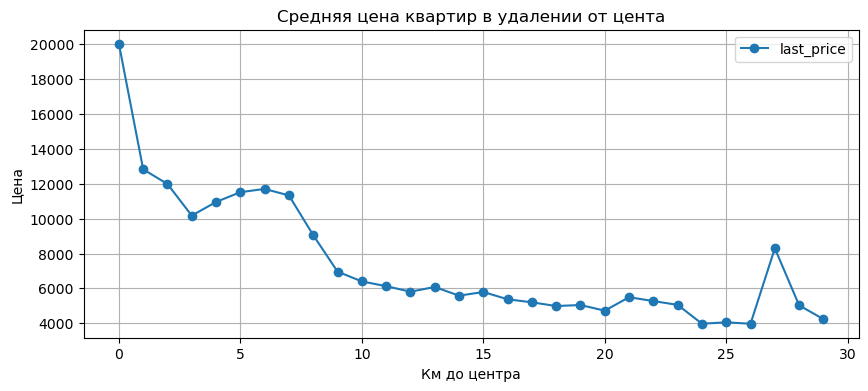

In [88]:
stat_km.plot(style='o-', title='Средняя цена квартир в удалении от цента', figsize=(10, 4), grid=True)
plt.xlabel('Км до центра')
plt.ylabel('Цена');

Что и следовало ожидать - чем ближе к центру, тем дороже, причём с первыми же километрами средняя цена падает резко - почти вдвое, затем небольшой рост и снова снижение - более плавно, но на 27 километре имеется небольшой пик. Проверим себя по медиане:

In [89]:
stat_km_median = price_km.pivot_table(index='city_centers_km', values='last_price', aggfunc='median')
stat_km_median

,last_price
city_centers_km,
0.0,13500.000
1.0,10600.000
2.0,9500.000
3.0,8350.000
4.0,9000.000
5.0,9090.000
6.0,8500.000
7.0,7300.000
8.0,7375.000


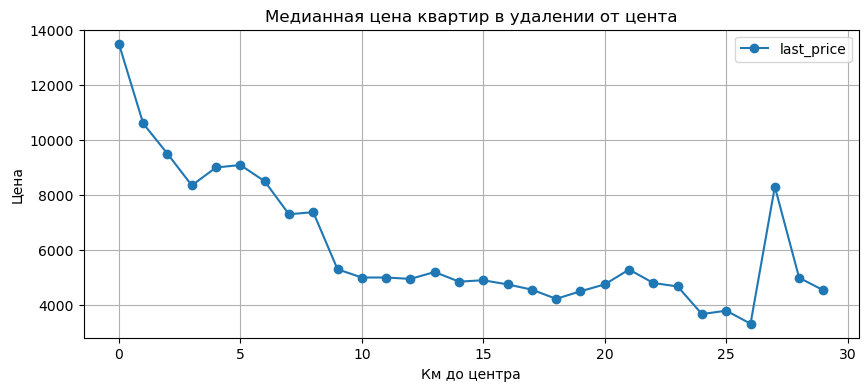

In [90]:
stat_km_median.plot(style='o-', title='Медианная цена квартир в удалении от цента', figsize=(10, 4), grid=True)
plt.xlabel('Км до центра')
plt.ylabel('Цена');

**ВЫВОД** 

Ситуациа аналогичная: в 4-5 километрах есть престижные районы и что-то около КАД имеет стоимость как в 3-4 километрах от центра.

In [91]:
price_km_27 = price_km.query('city_centers_km == 27')
price_km_27

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_mq,exposition_day,exposition_month,exposition_year,floor_type,city_centers_km
458,13,14350.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0.0,NaN,128.0,193.92,1,11,2017,средний,27.0
3882,6,2250.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,NaN,0.0,NaN,178.0,70.31,1,2,2018,последний,27.0


На высокую среднюю цену на 27-м километре повлиял "выброс" - всего 2 квартиры: одна с высокой ценой и одна с низкой - и их средняя и медианная создали нам "шум". Правдоподобность пика аннулирована.

In [92]:
price_km_3 = price_km.query('city_centers_km == 3')
price_km_3_count = price_km_3.pivot_table(index='floor_type', values='last_price', aggfunc='count')
price_km_3_count

,last_price
floor_type,
первый,54
последний,77
средний,212


In [93]:
price_km_5 = price_km.query('city_centers_km == 5')
price_km_5_count = price_km_5.pivot_table(index='floor_type', values='last_price', aggfunc='count')
price_km_5_count

,last_price
floor_type,
первый,78
последний,135
средний,663


Провал на 3-м километре и пик на 5 обусловлен количеством продаваемых квартир: 343 - на 3-м и 876 на 5-м. Количество неоднородно, а т.к. районы можно отнести к престижным - чем больше объявлений с высокой ценой в них будут, тем больше окажутся и средняя и медиана.

# Общий вывод

Для корректной работы с датасетом была проведена предобработка данных - устранена часть пропусков, где это возможно, испралены некорректные значения, оптимизированы названия населенных пунктов (в будующем, при сборе данной информации, стоит уделить больше внимания - например, автоматизировать по геоданным, т.к. могут попадаться населённые пункты разных типов, но с аналогичными названиями). Есть предположение, что часть некорректных и пропущенных значений является ошибками ввода, часть - следствием невозможности обработать адрес объекта (на момент заполнения объект мог быть в строительстве и ему не присвоен адрес, укрупнение населённых пунктов, их переименование).

Из полученного датасета можно сделать вывод, что в центре Петербурга квартиры дороже, чем на окраине и в Ленобласти. Как по центру Санкт-Петербурга, так и по всей области, наблюдается корреляция между ценой объекта и его площадью, что вполне логично. Средняя - между ценой и жилой площадью, количеством комнат и площадью кухни.

Также было выявлено, что количество объявлений и динамика продаж росли, т.к. с годами появлялось всё больше квартир малой площади. 

Для более точной оценки рыночной стоимости квартиры, на мой взгляд, следует учитывать также: 
- первичный или вторичный рынок недвижимости
- расстояние до метро
- год постройки
- наличие парковок
- производился ли ремонт
- есть ли газ
- есть ли горячее водоснабжение

Стоимость квартиры при этом может зависеть и от других факторов - в центре квартиры ценятся за расположение, историческую ценность, а на окраине - за ликвидность или возможность сдачи в аренду. Стоит учитывать и фактор близости к крупным производствам - люди не любят тратить много времени на дорогу до работы и обратно.